---
# <center style="color:#fd7b12"><span>Bank Turnover Dataset</span></center>

## <center style="color:#fd7b12"><span> BY OUEDRAOGO SALAM </span></center>

### <center style="color:#fd7b12"><span> 13/11/2022 </span></center>
---

## <center><span style="text-decoration:underline">INTRODUCTION </span></center>
Durant ces dernières années, nous avons assisté à une importante augmentation du nombre des institutions financière dans plusieurs pays. Face à des choix toujours vastes, les consommateurs sont très volatiles. Alors, la prise en compte de l’expérience et la satisfaction cliente est devenues plus que jamais nécessaire pour fidéliser ces clients et par conséquent gagner une importante part de marché. Il est dans l’intérêts des banques de choisir des stratégies de fidélisation efficace face à la concurrence. En effet, des études prouvent que les coûts engendrés par la mise en œuvre de stratégie de fidélisation sont bien moindres que ceux destinées à la conquête du nouveau marché. La mise à en place d’une stratégie doit faire l’objet d’une étude pour comprendre les facteurs permettant de mieux retenir un client. 

 C’est dans le cadre de cette étude que nous intervenons en tant que data analyste pour mettre en évidence les facteurs de rétention d’un client potentiel. Pour ce faire nous utiliserons des données Bank Turnover Dataset collectées sur la plateforme Kaggle. Cet ensemble de données contient les informations de 10000 clients de la banque avec 14 variables d’étude. Pour mener à bien notre étude, nous allons commencer par la préparation des données qui consiste à évaluer et à nettoyer nos données.


## <center><span style="text-decoration:underline">QUESTIONS </span></center>


1. Dans quel pays on enregistre le plus de client qui quittent la banque ?
2. Le nombre d’année passé dans une banque favorise-t-il la fidélisation client ?
3. Quels sont les caractéristiques susceptibles de déterminer si un client pourrait quitter la banque ?
4. Sur quelle caractéristique pouvons-nous nous baser nous retenir un client susceptible de quitter ?


## <center><span style="text-decoration:underline">PRÉPARATION DES DONNÉES </span></center>

In [1]:
# Importations des librairies et modules necéssaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Configurations 
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.facecolor"] = "white"
base_color = sns.color_palette()[0]

### Evaluation du dataset

In [3]:
# Chargement du dataset 
churn = pd.read_csv("./data/Churn_Modelling.csv")
churn_clean = churn.copy()

In [4]:
# Dimension du dataset
churn_clean.shape

(10000, 14)

In [5]:
# Information exaustive sur les 
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


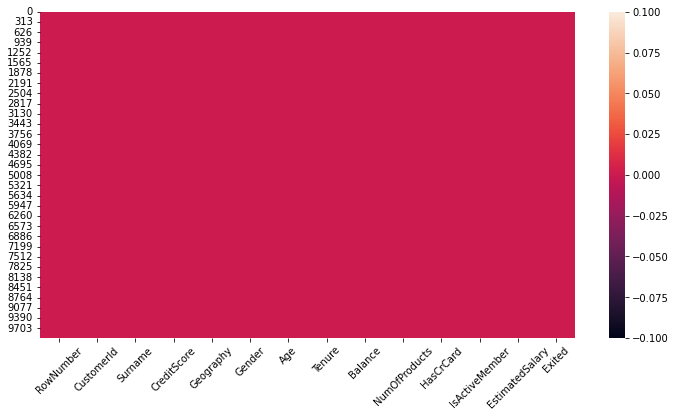

In [6]:
sns.heatmap(churn_clean.isna())
plt.xticks(rotation=45);

In [7]:
# Affichage de 10 lignes aléatoires
churn_clean.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4029,4030,15634218,Mancini,501,Germany,Male,27,4,95331.83,2,1,0,132104.76,0
7002,7003,15687688,Hou,564,Germany,Female,32,10,139875.20,2,1,0,15378.23,0
9799,9800,15722731,Manna,653,France,Male,46,0,119556.10,1,1,0,78250.13,1
546,547,15708916,Paterson,587,France,Male,38,0,0.00,2,1,0,47414.15,0
9866,9867,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0
9283,9284,15752186,Padovano,562,France,Female,27,3,0.00,2,1,0,28137.03,0
3103,3104,15766609,Jowers,655,France,Female,47,10,0.00,2,1,0,167778.62,0
4299,4300,15711991,Chiawuotu,615,France,Male,30,8,0.00,2,0,0,3183.15,0
7545,7546,15615176,Welsh,732,France,Male,26,7,0.00,2,1,0,154364.66,0
8565,8566,15749068,Nickson,632,France,Female,40,9,139625.34,1,1,0,93702.96,1


In [8]:
# describetion des variables quantitatives
churn_clean.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Les différentes modalités des variables
churn_clean.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Nom de la colonne HasCrCard n'est pas assez exaustive;  
- Nom des des variables(columns) en PascalCase;  
- Les colonnes RowNumber, CustomerId, Surname n'ont pas de grande importance dans notre analyse.

### Nettoyage

##### Définition : Nom de la colonne HasCrCard n'est pas assez exaustive; 
La correction se fera en remplaçant HasCrCard par HasCreditCard pour des raisons d'exhaustivité.

##### Code

In [10]:
churn_clean.rename(columns={"HasCrCard":"HasCreditCard"}, inplace=True)

##### Test

In [11]:
churn_clean.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [12]:
churn_clean.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCreditCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##### Définition : Nom des des variables(columns) en PascalCase;  
Pour des raisons de simplicité, il est nécessaire de recoder tout les variables Camel case.

##### Code

In [13]:
churn_clean.columns = churn_clean.columns.str.lower()

In [14]:
churn_clean.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 
                 'balance', 'num_of_products', 'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'
                ]

##### Test

In [15]:
churn_clean.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products',
       'has_credit_card', 'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

##### Définition : Les colonnes RowNumber, CustomerId, Surname n'ont pas de grande importance dans notre analyse.
Il s'agit de supprimer ces colonnes qui n'ont aucune valeur ajoutée dans notre analyse.

##### Code

In [16]:
churn_clean.drop(columns=["row_number", "customer_id", "surname"], inplace=True)

##### Test

In [17]:
churn_clean.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [18]:
churn_clean.to_csv("./data/Churn_Modelling_clean.csv")

### Conclusion
> Durant la phase de préparation des données, l'objectif en tête est d'avoir un dataset pur pour l'analyse. Cela a le mérite de conduire à une bonne analyse et par conséquent produire des résultats corrects et satisfaisant. 
> 
> Dans la phase d'évaluation, nous avons découvert que notre dataset était exhaustive : absence de valeur manquante. Cependant, j'ai pu découvrir certains problèmes de cohérence que j'ai pris le soin de traiter.  
> 
> Après cette phase de préparation, je passe maintenant à la phase d'Analyse Exploratoire des données.


## <center><span style="text-decoration:underline">ANALYSE EXPLORATOIRE DES DONNÉES </span></center>

## <center><span style="text-decoration:underline">ANALYSE UNIVARIÉE</span></center>

### Quelle pays est le plus répresenté ?

In [19]:
geography_counts = churn_clean.geography.value_counts()
geography_counts

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

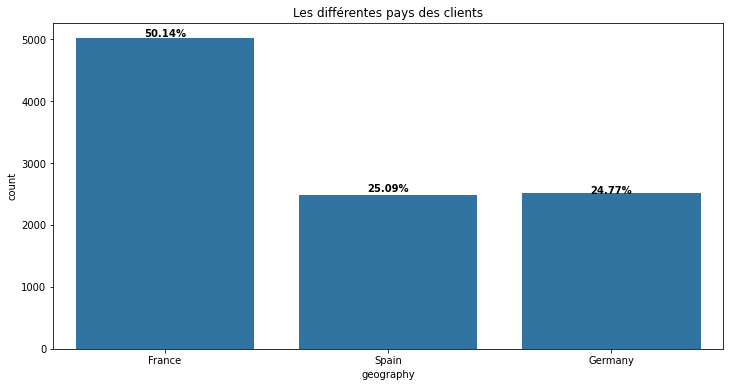

In [20]:
sns.countplot(data = churn_clean, x="geography", color=base_color)
plt.xticks()
for i in range(len(geography_counts)):
    count = geography_counts[i]
    count_str = f'{np.round(100 * count/geography_counts.sum(), 3)}%'
    plt.text(i, count, count_str, va="bottom", ha="center", fontweight="bold")
plt.title("Les différentes pays des clients");

#### Interprétation

Sur un ensemble de 10_000 lignes, la majorité des clients sont des français avec une proportion de 50.14%. En effet, ce résultat s'explique par le fait que les transformations digitales depuis ces derniers temps ont très vite conquis le cœur des français. Cependant, il existe bien d'autre facteurs qui peuvent expliquer ce phénomène. En plus de la France, nous avons d’autre pays comme l’Espagne et l’Allemagne qui représente respectivement 25.09% et 24.77%.

In [21]:
churn_clean.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Qui des Hommes ou des Femmes sont plus active dans la création des comptes bancaires?

In [22]:
gender_counts = churn_clean.gender.value_counts()

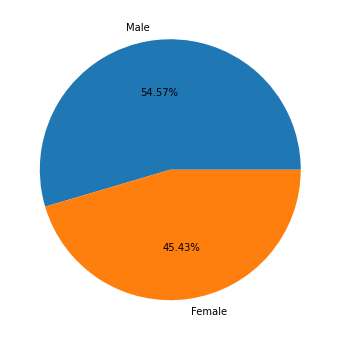

In [23]:
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.2f%%");

#### Interprétation

Notre dataset contient majoritaire d'homme qui ont des comptes bancaires que des femmes. Nous avons 54.57% d'homme et 45.43% de femmes sur un ensemble de 10_000 personnes. Les hommes sont plus actifs dans la création des comptes bancaires que les femmes.

In [24]:
num_of_products_counts = churn_clean.num_of_products.value_counts()
num_of_products_counts

1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64

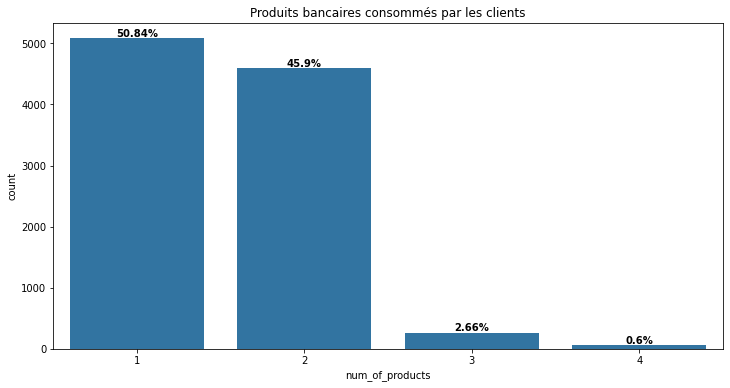

In [25]:
sns.countplot(data = churn_clean, x="num_of_products", color=base_color);
for i in range(1, len(num_of_products_counts)+1):
    count = num_of_products_counts[i]
    count_str = f'{np.round(100 * count/num_of_products_counts.sum(), 2)}%'
    plt.text(i-1, count, count_str, ha="center", va="bottom", fontweight="bold")
plt.title("Produits bancaires consommés par les clients");

#### Interprétation
Les institutions financière propose plusieurs services à leurs clients. Ces services sont dependant du type de client. Notre Banque ici propose 4 services. La moitié soit 50.84% des clients consomment un seul produits de la banque. 45.9% des clients consomme 2 produits de la banque. Et nous avons rarement des clients qui consommes 3 et 4 produits de la banque. 

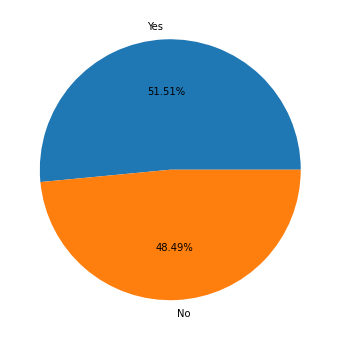

In [26]:
is_active_member_counts = churn_clean.is_active_member.value_counts()
plt.pie(is_active_member_counts, labels=["Yes", "No"], autopct="%.2f%%");

#### Interprétation

51.51% des clients de la banque sont trés actifs contre 48.49% des clients dont les opérations dans la banque sont moins fréquentes.

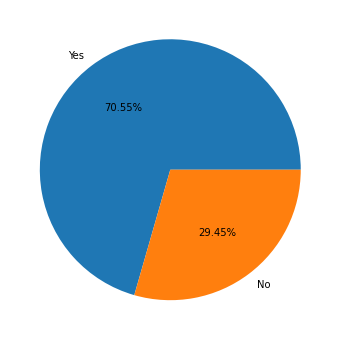

In [27]:
has_credit_card_counts = churn_clean.has_credit_card.value_counts()
plt.pie(has_credit_card_counts, labels=["Yes", "No"], autopct="%.2f%%");

#### Interprétation

Sur l'ensemble des clients seulement 70.55% des clients ont une carte de credits. Et 29.45% des clients sont sans cartes de credit.

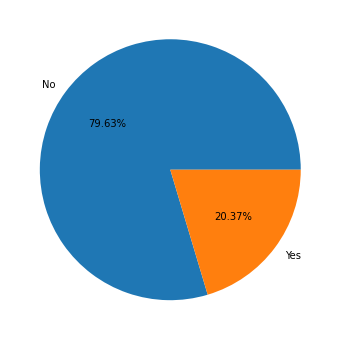

In [28]:
exited_counts = churn_clean.exited.value_counts()
plt.pie(exited_counts, labels=["No", "Yes"], autopct="%.2f%%");

#### Interprétation

Sur 10_000 clients, 79, 63% des clients n'ont pas quitté la banque contre 20.37% qui l'on fait.

In [29]:
tenure_counts = churn_clean.tenure.value_counts()
tenure_counts

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

In [30]:
tenure_order = tenure_counts.index.to_list()
tenure_order

[2, 1, 7, 8, 5, 3, 4, 9, 6, 10, 0]

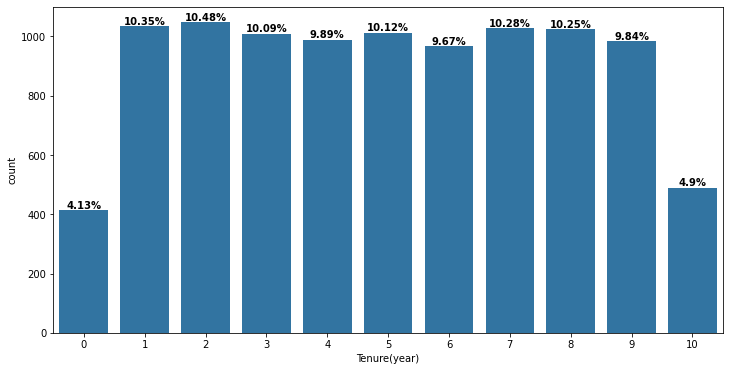

In [31]:
sns.countplot(data = churn_clean, x="tenure", color=base_color)
for i in tenure_order:
    count = tenure_counts[i]
    count_str = f'{np.round(100 * count/tenure_counts.sum(), 2)}%'
    plt.text(i, count, count_str, ha="center", va="bottom", fontweight="bold")
plt.xlabel("Tenure(year)");

In [32]:
churn_clean.age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [33]:
age_bins = np.arange(18, 92, 1)

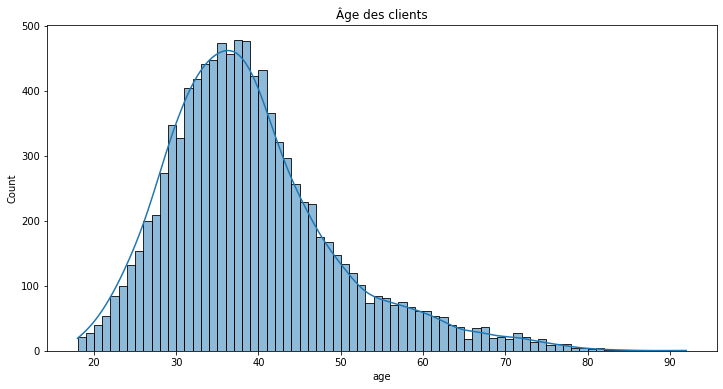

In [34]:
sns.histplot(data=churn_clean, x="age", kde=True, bins=age_bins)
plt.title("Âge des clients");

#### Interprétation

Le plus jeune client dans cette banque à 18 ans tandis que le plus vieux à 92 ans. La majorité des clients ont un âge compris entre 30 à 40 ans. 25% des clients ont un âge inférieur à 32. Ce qui nous permet de dire qu'en majorité, les clients dans cette banque ont en majorité 33 ans et plus. Il y'a de moins en moins de jeune qui possède des comptes bancaires.

In [35]:
churn_clean.balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [36]:
xticks = np.arange(0, 250+50, 50)
xticks_str = [f'{tick}k' for tick in xticks]

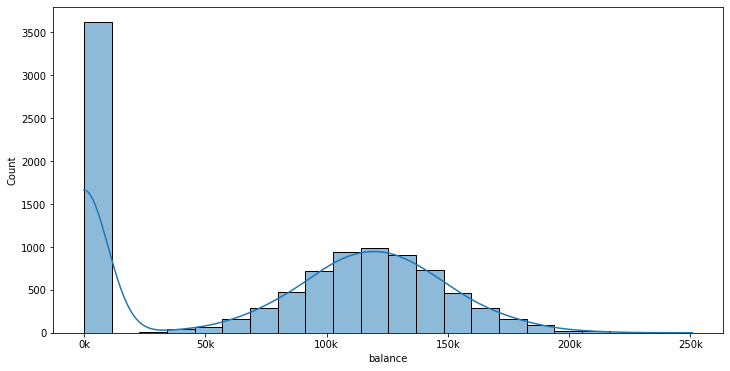

In [37]:
sns.histplot(data=churn_clean, x="balance", kde=True)
plt.xticks(xticks*1000, xticks_str);

### Interprétation

Le montant minimal dans le compte bancaire des clients est de 0.00 tandis que le montant maximal est 250 000. Cependant, nous observons que 25% des clients n’ont absolument rien dans leur compte bancaire. Ce qui est anormal car dans pour chaque compte il y'a un dépôt initial à effectuer pour ne pas avoir un compte sans argent. Il faut également noter que la majorité des clients ont une somme supérieure à 100 000 dans leur compte bancaire.

In [38]:
churn_clean.estimated_salary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

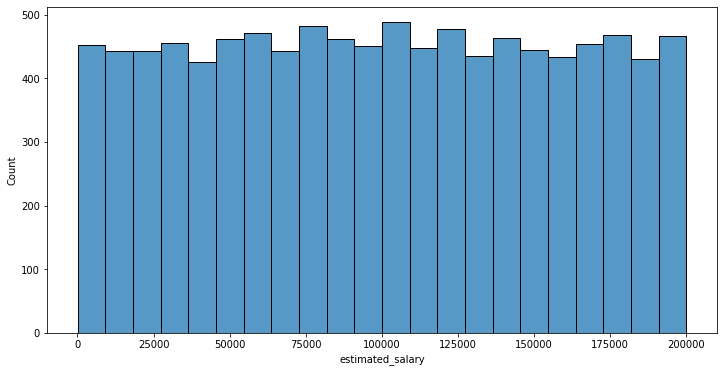

In [39]:
sns.histplot(data=churn_clean, x="estimated_salary")

In [40]:
churn_clean.credit_score.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

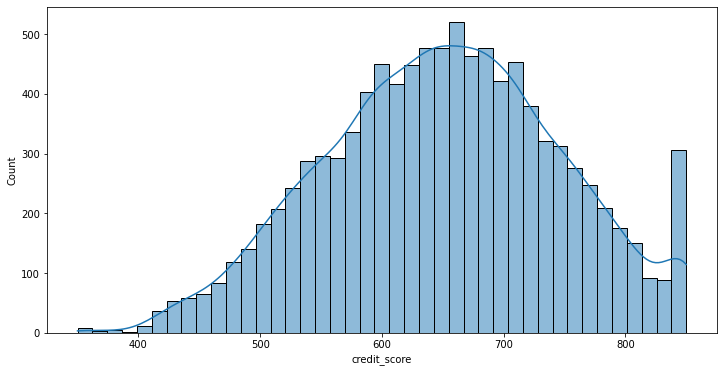

In [41]:
sns.histplot(data=churn_clean, x="credit_score",kde=True)

### Interprétation

Les clients avec un score plus élevé sont beaucoup moins susceptibles de quitter la banque. Le score minimal est 350 tandis que le score maximal est de 850. Nous avons en moyenne un score qui est égale à 650. Ce qui est très bon pour l'entreprise car la majorité des clients ont un bon score ce qui permet favorise la fidélisation des clients.

## <center><span style="text-decoration:underline">ANALYSE BIVARIÉE & MULTIVARIÉE</span></center>

In [42]:
churn_clean.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
churn_clean.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [44]:
churn_grouped = churn_clean.groupby('geography')

In [45]:
churn_grouped[['exited']].value_counts()

geography  exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64

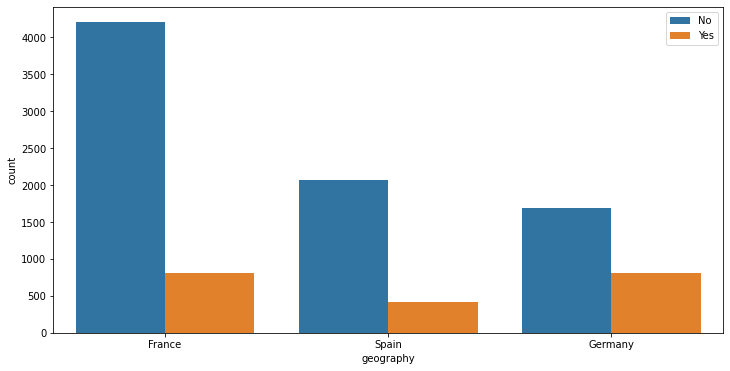

In [46]:
sns.countplot(data = churn_clean, x="geography", hue="exited");
plt.legend(labels=["No", "Yes"]);

### Interprétation

Beaucoup plus de français et d'allemands ont quitté la banque par rapport aux espagnols. Même la différences est moins significatif, nous pouvons dire qu'il y'a moins de français qui ont quitté la banque comparativement aux allemands. 

In [47]:
churn_grouped[["credit_score", "balance"]].describe()

credit_score                                                     \
                 count        mean        std    min    25%    50%    75%   
geography                                                                   
France          5014.0  649.668329  97.016799  350.0  582.0  653.0  717.0   
Germany         2509.0  651.453567  98.168937  350.0  584.0  651.0  722.0   
Spain           2477.0  651.333872  94.365051  350.0  587.0  651.0  715.0   

                 balance                                                    \
             max   count           mean           std       min        25%   
geography                                                                    
France     850.0  5014.0   62092.636516  64133.565524      0.00       0.00   
Germany    850.0  2509.0  119730.116134  27022.006157  27288.43  102800.72   
Spain      850.0  2477.0   61818.147763  64235.555208      0.00       0.00   

                                              
                 50%          75%        max  
geography                                     
France      62153.50  121444.8775  238387.56  
Germany    119703.10  137560.3800  214346.96  
Spain       61710.44  121056.6300  250898.09

In [48]:
churn_grouped[["estimated_salary"]].describe()

estimated_salary                                                 \
                     count           mean           std     min       25%   
geography                                                                   
France              5014.0   99899.180814  57336.289016   90.07  51399.19   
Germany             2509.0  101113.435102  58263.011501   11.58  51016.02   
Spain               2477.0   99440.572281  57103.678091  417.41  50267.69   

                                            
                 50%        75%        max  
geography                                   
France      99132.31  149295.36  199929.17  
Germany    102397.22  151083.80  199970.74  
Spain       99984.86  147278.43  199992.48

In [49]:
churn_clean.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

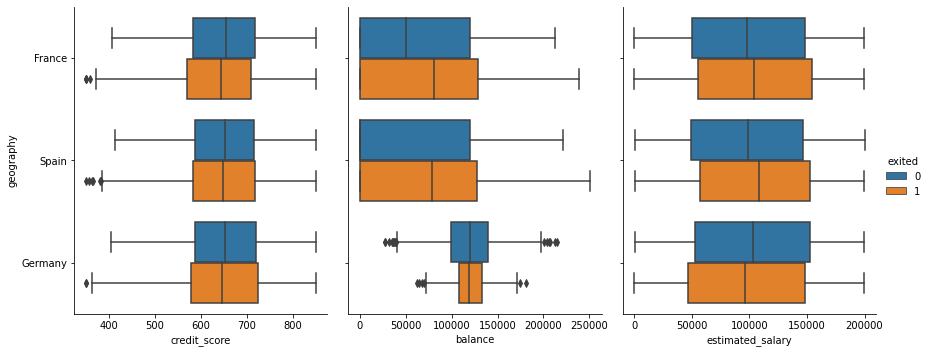

In [50]:
g = sns.PairGrid(data = churn_clean, y_vars='geography', x_vars=['credit_score', 'balance', 'estimated_salary'],hue='exited', height=5, aspect=0.8)
g.map(sns.boxplot);
g.add_legend()

### Interprétation



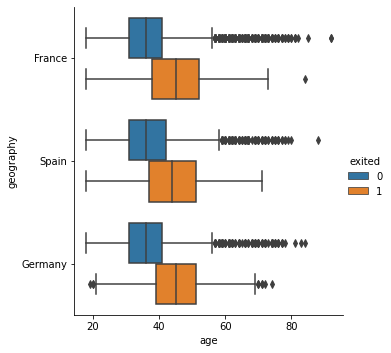

In [51]:
g = sns.PairGrid(data = churn_clean, y_vars='geography', x_vars=['age'],hue='exited', height=5, aspect=0.9)
g.map(sns.boxplot);
g.add_legend()

In [52]:
churn_grouped[['has_credit_card']].value_counts()

geography  has_credit_card
France     1                  3543
           0                  1471
Germany    1                  1791
           0                   718
Spain      1                  1721
           0                   756
dtype: int64

<AxesSubplot:xlabel='has_credit_card', ylabel='count'>

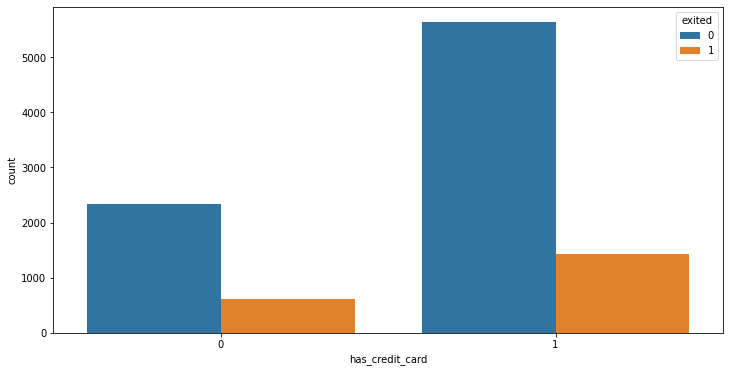

In [53]:
sns.countplot(data = churn_clean, x='has_credit_card', hue='exited')

In [54]:
churn_clean.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
tenure_exit_size = churn_clean.groupby(['tenure', 'exited']).size().reset_index(name='count')

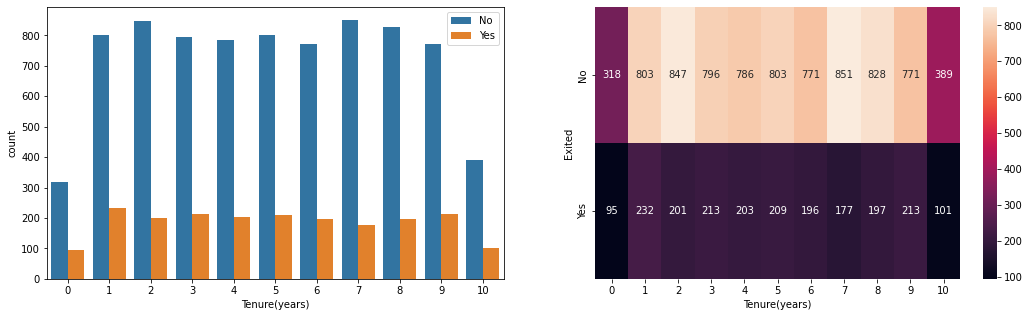

In [56]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.countplot(data = churn_clean, x='tenure', hue='exited')
plt.legend(labels=['No', 'Yes'])
plt.xlabel('Tenure(years)')
plt.subplot(1, 2, 2)
tenure_exit_pivot = tenure_exit_size.pivot(index='exited', columns='tenure', values='count')
sns.heatmap(tenure_exit_pivot, annot=True, fmt='d')
plt.yticks([0.5, 1.5], ['No', 'Yes'])
plt.xlabel('Tenure(years)')
plt.ylabel('Exited');

### Interprétation

Plus le nombre d'année augmente, plus le client se fidelise à la banque. Seule les nouveaux clients sont parfois susceptible de quitté la banque car, nous avons une proportion elevé de clients qui ont quitté la banque. Les vieux clients quitte rarement les banques. C'est carement aprés 9 ans de fidélisation que le client peut être amener à quitter la banque.

In [57]:
churn_clean.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
churn_clean[['gender', 'exited']].value_counts() * 100 / churn_clean[['gender', 'exited']].value_counts().sum()

gender  exited
Male    0         45.59
Female  0         34.04
        1         11.39
Male    1          8.98
dtype: float64

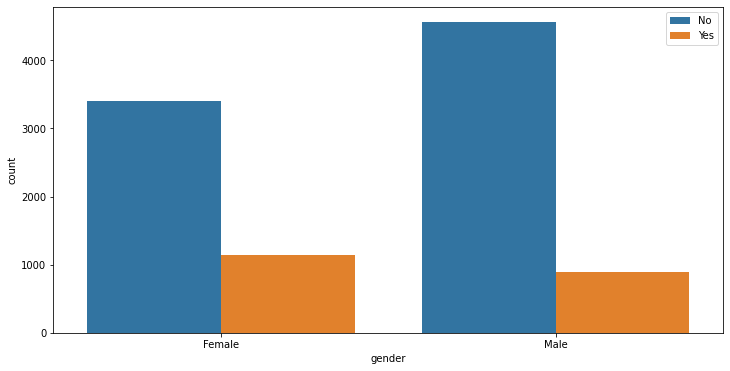

In [59]:
sns.countplot(data = churn_clean, x="gender", hue="exited")
plt.legend(labels=['No', 'Yes']);

### Interprétation

Le nombre de femme étant quasiment égale au nombre d'homme, nous pouvons dire avec reserve que les femmes sont beaucoup plus susceptible de quitter la banque que les hommes.

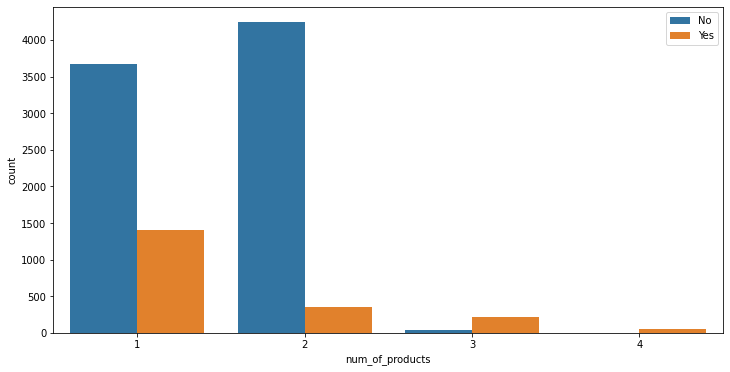

In [60]:
sns.countplot(data = churn_clean, x="num_of_products", hue="exited")
plt.legend(labels=['No', 'Yes']);

### Interprétation

Les clients qui consomment aumoins deux produits de la banque quittent rarement les banques. C'est quand la consommation augmente que l'on observe que la banque peut plus facilement perdre ces clients.

In [61]:
churn_clean[['has_credit_card', 'exited']].value_counts()

has_credit_card  exited
1                0         5631
0                0         2332
1                1         1424
0                1          613
dtype: int64

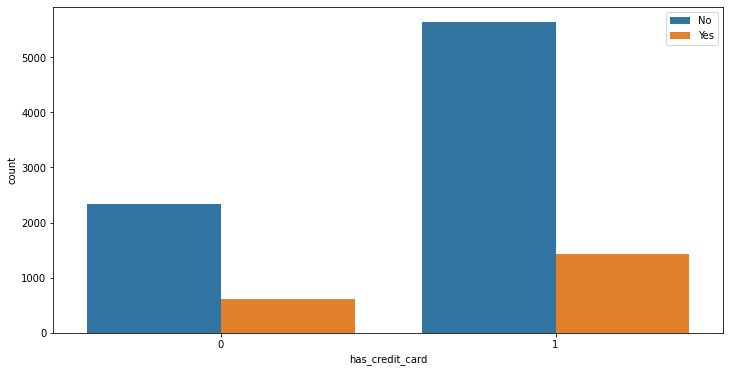

In [62]:
sns.countplot(data = churn_clean, x="has_credit_card", hue="exited")
plt.legend(labels=['No', 'Yes']);

### Interprétation

L'abandon d'une banque par un client ne peut être expliquer si l'on se base une le fait si le client à une carte bancaire ou non. En effet, bien qu'il y'a moins de personne qui ont une carte bancaire, nous avons 30% des personnes qui quittent la banque malgré qu'ils ont une carte bancaire ou non. Et 70% des clients qui n'abandonent pas la banque.

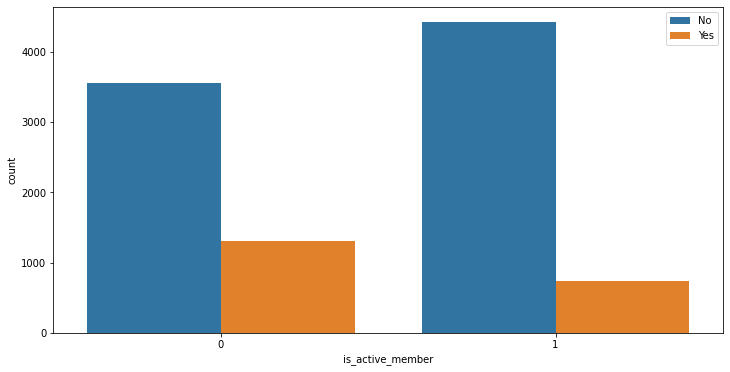

In [63]:
sns.countplot(data = churn_clean, x="is_active_member", hue="exited")
plt.legend(labels=['No', 'Yes']);

### Interprétation

Lorsqu'un client un trés active dans une banque, ceux qui veut dire qu'il effectue beaucoup de transaction, alors moins il a envie de quitter une banque. En effet, notre graphique nous montre que les clients les plus actives ont une faible tendance à quitter la banque. Parcontre les clients qui sont pas assez active sont beaucoup plus susceptible de quitter la banque à tous moment.

In [64]:
import plotly.figure_factory as ff
import numpy as np

In [65]:
churn_France = churn_grouped.get_group("France")
churn_Spain = churn_grouped.get_group("Spain")
churn_Germany = churn_grouped.get_group("Germany")

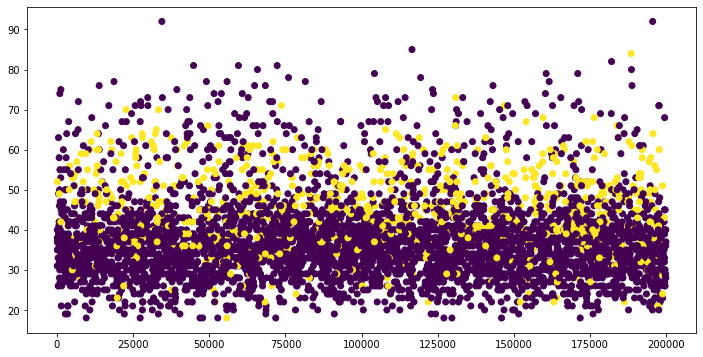

In [66]:
plt.scatter(data=churn_France, x='estimated_salary', y='age', c='exited')

## <center><span style="text-decoration:underline">MODELE DE PREDICTION</span></center>

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score,learning_curve, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

In [68]:
churn_obj = churn_clean.select_dtypes(include='object')

In [69]:
oneHotEncoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_Hot_Data = oneHotEncoder.fit_transform(churn_obj)
one_hot_data_cols = oneHotEncoder.get_feature_names_out()
encoded_df = pd.DataFrame(data = one_Hot_Data, columns=one_hot_data_cols)

In [70]:
churn_num = churn_clean[['credit_score', 'balance', 'estimated_salary']]

In [71]:
standardScaler = StandardScaler()
scaler_data = standardScaler.fit_transform(churn_num)
scaler_data_cols = standardScaler.get_feature_names_out()
scaler_df = pd.DataFrame(scaler_data, columns=scaler_data_cols)

In [72]:
rest_columns = ['age', 'tenure', 'num_of_products', 'has_credit_card', 'is_active_member', 'exited']

In [73]:
df_final = pd.concat([scaler_df, encoded_df, churn_clean[rest_columns]], axis=1)

In [74]:
pca = PCA()
pca.fit(df_final.iloc[:, :-1])

PCA()

In [75]:
np.round(pca.explained_variance_ratio_* 100, 4)

array([89.2306,  6.7852,  0.8933,  0.8125,  0.8091,  0.4027,  0.2956,
        0.2436,  0.201 ,  0.1693,  0.1571,  0.    ,  0.    ])

In [76]:
variance_ration = np.round(0.5 +pca.explained_variance_ratio_* 100, 2) 

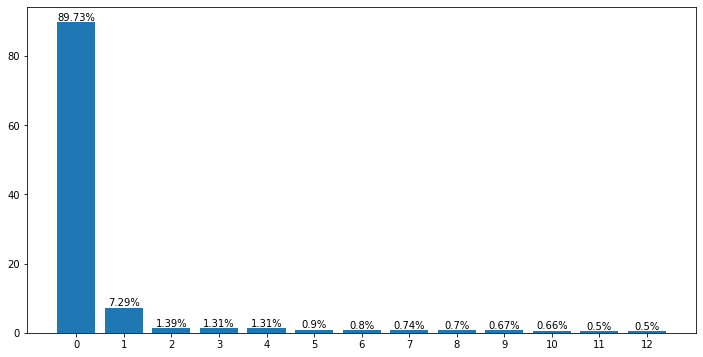

In [77]:
plt.bar(x=np.arange(pca.n_components_), height=variance_ration)
plt.xticks(np.arange(pca.n_components_));
for i in range(len(variance_ration)):
    count = variance_ration[i]
    count_str = f'{count}%'
    plt.text(i, count, count_str, ha="center", va="bottom")

In [78]:
real_pca = PCA(n_components=2)
principale_components = real_pca.fit_transform(df_final.iloc[:, :-1])

In [79]:
variance_ration = np.round(100 * real_pca.explained_variance_ratio_, decimals=2)

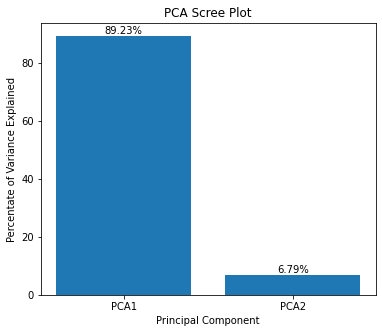

In [80]:
plt.figure(figsize=(6, 5))
plt.bar(x=np.arange(1, real_pca.n_components_+1), height=variance_ration, tick_label=['PCA1', 'PCA2'])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
for i in range(len(variance_ration)):
    count = variance_ration[i]
    count_str = f'{count}%'
    plt.text(i+1, count, count_str, ha="center", va="bottom")

In [81]:
features_output = [f'{output}'.upper() for output in real_pca.get_feature_names_out()]

In [82]:
pca_components = pd.DataFrame(principale_components, columns=features_output)
pca_components["exited"] = df_final.exited

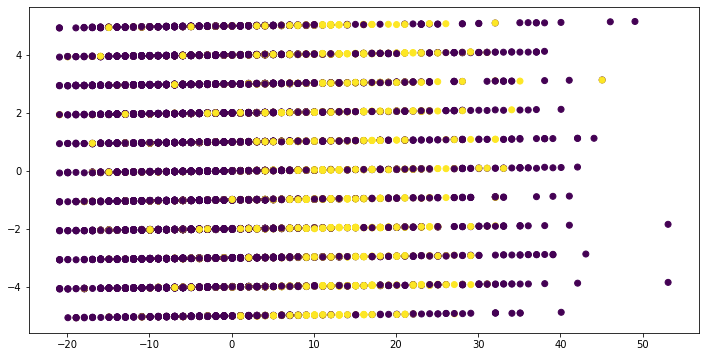

In [83]:
plt.scatter(data=pca_components, x="PCA0", y="PCA1", c="exited")

In [84]:
min_pca_components = pca_components.query("exited==1")
max_pca_components = pca_components.query("exited==0")
max_pca_components = max_pca_components.sample(len(min_pca_components))

In [85]:
k = 100
min_pca_components = min_pca_components.sample(int(k * len(min_pca_components)/100))
max_pca_components = max_pca_components.sample(int(k * len(max_pca_components)/100))

In [86]:
len(min_pca_components)

2037

In [87]:
df_concat = pd.concat([min_pca_components, max_pca_components], axis=0, ignore_index=True)
df_concat.shape

(4074, 3)

In [88]:
X = df_concat.iloc[:, :-1]
y = df_concat.exited

In [89]:
C_range = np.logspace(-1, 3, 6)
gamma_range = np.logspace(-5, 1, 7)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
gridSearchCV = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
gridSearchCV.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': array([1.00000000e-01, 6.30957344e-01, 3.98107171e+00, 2.51188643e+01,
       1.58489319e+02, 1.00000000e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])})

In [90]:
gridSearchCV.best_estimator_

SVC(C=25.11886431509582, gamma=0.001)

In [91]:
gridSearchCV.best_score_

0.6858895705521473

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

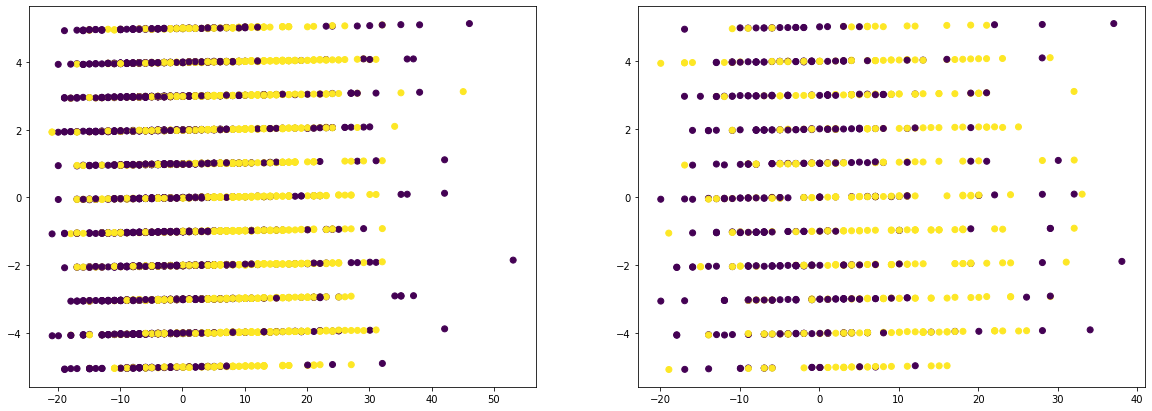

In [93]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)

plt.subplot(1, 2, 2)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test)

In [94]:
svc = gridSearchCV.best_estimator_
svc.fit(X_train, y_train)

SVC(C=25.11886431509582, gamma=0.001)

In [95]:
cv = 5
validation_score = cross_val_score(svc, X_train, y_train, cv=cv)
validation_score, validation_score.mean(), validation_score.std()

(array([0.70398773, 0.70705521, 0.67331288, 0.69325153, 0.68817204]),
 0.6931558809947885,
 0.0120757010144222)

In [96]:
y_predict = svc.predict(X_test)
print(svc.score(X_train, y_train))
print(accuracy_score(y_true=y_test, y_pred=y_predict))
print(f1_score(y_true=y_test, y_pred=y_predict))

0.6949984657870513
0.6858895705521473
0.6640419947506562


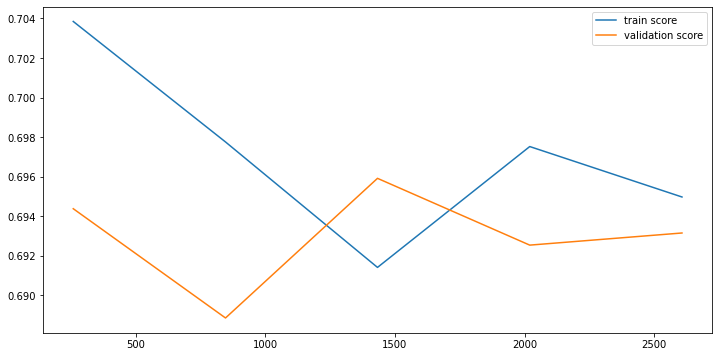

In [97]:
N, train_score, val_score = learning_curve(svc, X_train, y_train, cv=5)
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend();

In [98]:
print(classification_report(y_true=y_test, y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       404
           1       0.72      0.62      0.66       411

    accuracy                           0.69       815
   macro avg       0.69      0.69      0.68       815
weighted avg       0.69      0.69      0.68       815



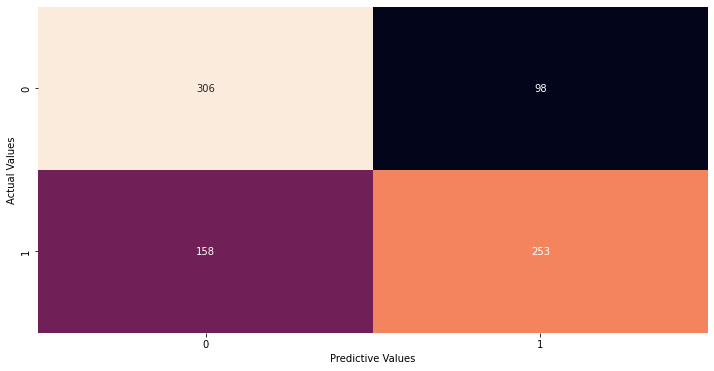

In [99]:
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_predict), annot=True,fmt="d",  cbar=False)
# plt.xticks([0.5, 1.5], ["Positive(0)", "Negative(1)"])
# plt.yticks([0.5, 1.5], ["Positive(0)", "Negative(1)"])
plt.ylabel("Actual Values")
plt.xlabel("Predictive Values");

## <center><span style="text-decoration:underline">CONCLUSION et LIMITES </span></center>

En résumé, pour fidéliser dans le secteur bancaire, il vous faut analyser les besoins et attentes du client. Ce travail vous permet non seulement de cibler plus précisément chaque typologie de clients mais également de proposer, à chacune d’entre elle, les produits comme les services les plus adaptés.  

Bien que notre dataset ne contient que trois pays avec chacun des nombres disproportionnés, nous avons pu mettre en évidence l’Espagne, le pays ou nous avons enregistré moins de clients qui abandonnent leur compte bancaire dans une banque.  


Les personnes qui restent pendant plusieurs années clients d’une banque sont beaucoup moins susceptible de quitter la banque étant donné qu’ils se sont fidélisés à la banque. Mais cependant, après une longue période de fidélisation par exemple 9 ans ou 10 ans, il client peut être amener à quitter la banque pour un autre ou pour d’autre raison.
